In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# 1 ACP canonique sur des données simulées

L’objectif est d’effectuer une ACP sur des données simulées pour mieux
comprendre le lien entre la forme du nuage de points correspondant, c’est-à-dire
la distribution des données, et les résultats (vecteurs propres et valeurs propres) fournis par l’ACP.

**1.1 Génération des donnée**

In [ ]:
mn = np.array([10, 20])
mn

array([10, 20])

In [ ]:
V = np.array([[25, -12], [-12, 9]])
mn = np.array([10, 20])
X = np.random.multivariate_normal(mean=mn , cov=V, size=100).T
X.shape

(2, 100)

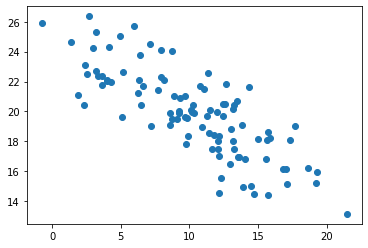

In [ ]:
plt.scatter(X[0], X[1])

In [ ]:
np.cov(X[0], X[1])

array([[ 22.06032676, -10.82167327],
       [-10.82167327,   8.38578337]])

In [ ]:
corr, _ = pearsonr(X[0], X[1])
corr

-0.7956400343856107

**1.2 Calcul des valeurs propres et vecteurs propres**

In [ ]:
X = np.array(X)
X.shape

(2, 100)

In [ ]:
X0 = X[0]
mean_x0 = np.mean(X0)
Y0 = [x - mean_x0 for x in X0]
X1 = X[1]
mean_x1 = np.mean(X1)
Y1 = [z - mean_x1 for z in X1]
Y0 = np.array(Y0)
Y1 = np.array(Y1)

In [ ]:
Y = [Y0, Y1]
Y = np.array(Y)
Y.shape

(2, 100)

In [ ]:
np.mean(Y[0]), np.mean(Y[1])

(1.616484723854228e-15, 1.6875389974302379e-15)

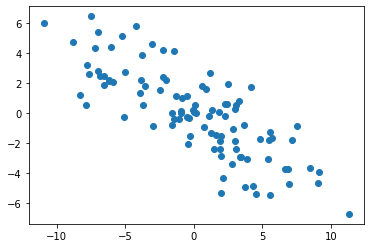

In [ ]:
plt.scatter(Y[0], Y[1])

In [ ]:
trans_yy = np.transpose(Y)
trans_yy.shape, Y.shape

((100, 2), (2, 100))

In [ ]:
poids = 100 * [0.01]
Dp = np.diag(poids)
Dp.shape

(100, 100)

In [ ]:
rslt1 = np.dot(Y, Dp)
rslt2 = np.dot(rslt1, trans_yy)
rslt2

array([[ 21.83972349, -10.71345654],
       [-10.71345654,   8.30192554]])

La valeur de la matrice de covariance qu'on a calculé est proche de celle données en énoncé :)

In [ ]:
V = rslt2
propres = np.linalg.eig(V)
propres

(array([27.74347792,  2.39817111]), array([[ 0.8758237 ,  0.48263117],
        [-0.48263117,  0.8758237 ]]))

In [ ]:
val_propres = propres[0]
vect_propres = propres[1]

# **1.3 Affichage et interprétation des résultats**

In [ ]:
val_propres

array([27.74347792,  2.39817111])

In [ ]:
# le vecteur propre associé à la premier valeur propre est
u1 = np.array([0.8758237 , -0.48263117])
u2 = np.array([0.48263117, 0.8758237 ])
l1 = 27.74347792
l2 = 2.39817111
u1 = np.transpose(u1)
I_1 = np.transpose(u1).dot(V).dot(u1)
I_1

27.743477908958486

l'inertie expliqué par un axe est la valeur propres y associée



1.   Pour le premier axe c'est 27.74347792,
2.   Pour le deuxieme axe c'est   2.39817111



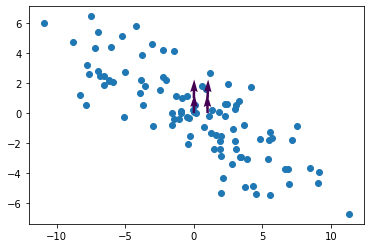

In [ ]:
plt.scatter(Y[0], Y[1])
plt.quiver([u1, u2], l1, l2)

Etudiez l’impact de la distribution des données, c’est-à-dire de la forme du
nuage de points, sur les valeurs propres et vecteurs propres obtenus en modifiant
la matrice de covariance de la loi normale. En particulier, comparez les résultats
obtenus pour différentes valeurs de covariance entre les 2 variables, par exemple
les valeurs extrêmes : 0 et 15.

# **1.4 Utilisation de la librairie Scikit-Learn**
Une autre façon d’obtenir les valeurs propres et vecteurs propres de la ma-
trice de covariance empirique consiste à effectuer une ACP sur les données cen-
trées Y. En effet, l’ACP fournit les axes principaux qui sont les vecteurs propres et l’inertie (on parle aussi de variance) sur chaque axe qui correspond à chaque valeur propre.

In [ ]:
from sklearn import decomposition
from sklearn import preprocessing
# ?decomposition.PCA

In [ ]:
# choix du nombre de composantes à calculer
n_comp = 2
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
principalComponents = pca.fit_transform(Y)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,35.905627,2.879468e-15
1,-35.905627,2.879468e-15


In [ ]:
pca.explained_variance_

array([2.5784281e+03, 1.6582668e-29])

In [ ]:
#pca.components_

In [ ]:
pca.explained_variance_ratio_

array([1.00000000e+00, 6.43130903e-33])

In [ ]:
pca.singular_values_

array([5.07782247e+01, 4.07218221e-15])

In [ ]:
"""def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(pca)"""

'def display_scree_plot(pca):\n    scree = pca.explained_variance_ratio_*100\n    plt.bar(np.arange(len(scree))+1, scree)\n    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker=\'o\')\n    plt.xlabel("rang de l\'axe d\'inertie")\n    plt.ylabel("pourcentage d\'inertie")\n    plt.title("Eboulis des valeurs propres")\n    plt.show(block=False)\ndisplay_scree_plot(pca)'

In [ ]:
# 1 seule composant?
# choix du nombre de composantes à calculer
n_comp = 1
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
principalComponents = pca.fit_transform(Y)

In [ ]:
pca.explained_variance_

array([2578.42810486])

In [ ]:
pca.explained_variance_ratio_

array([1.])

In [ ]:
#pca.components_

In [ ]:
pca.singular_values_

array([50.77822471])

# **2 ACP normée sur des données réelles**

In [ ]:
from google.colab import files
files.upload()

Saving activities.csv to activities.csv


{'activities.csv': b'POP\tPROF\tTRAN\tMENA\tENFA\tCOUR\tTOIL\tREPA\tSOMM\tTELE\tLOIS\tSEX\tACT\tCIV\tPAY\r\nHAU\t610\t140\t60\t10\t120\t95\t115\t760\t175\t315\t1\t1\t9\t1\r\nFAU\t475\t90\t250\t30\t140\t120\t100\t775\t115\t305\t2\t1\t9\t1\r\nFNU\t10\t0\t495\t110\t170\t110\t130\t785\t160\t430\t2\t2\t9\t1\r\nHMU\t615\t140\t65\t10\t115\t90\t115\t765\t180\t305\t1\t9\t2\t1\r\nFMU\t179\t29\t421\t87\t161\t112\t119\t776\t143\t373\t2\t9\t2\t1\r\nHCU\t585\t115\t50\t0\t150\t105\t100\t760\t150\t385\t1\t9\t1\t1\r\nFCU\t482\t94\t196\t18\t141\t130\t96\t775\t132\t336\t2\t9\t1\t1\r\nHAW\t653\t100\t95\t7\t57\t85\t150\t808\t115\t330\t1\t1\t9\t2\r\nFAW\t511\t70\t307\t30\t80\t95\t142\t816\t87\t262\t2\t1\t9\t2\r\nFNW\t20\t7\t568\t87\t112\t90\t180\t843\t125\t368\t2\t2\t9\t2\r\nHMW\t656\t97\t97\t10\t52\t85\t152\t808\t122\t321\t1\t9\t2\t2\r\nFMW\t168\t22\t528\t69\t102\t83\t174\t824\t119\t311\t2\t9\t2\t2\r\nHCW\t643\t105\t72\t0\t62\t77\t140\t813\t100\t388\t1\t9\t1\t2\r\nFCW\t429\t34\t262\t14\t92\t97\t147\t849\t8

In [ ]:
df = pd.read_csv("activities.csv",delim_whitespace=True)
df.head()

,POP,PROF,TRAN,MENA,ENFA,COUR,TOIL,REPA,SOMM,TELE,LOIS,SEX,ACT,CIV,PAY
0,HAU,610,140,60,10,120,95,115,760,175,315,1,1,9,1
1,FAU,475,90,250,30,140,120,100,775,115,305,2,1,9,1
2,FNU,10,0,495,110,170,110,130,785,160,430,2,2,9,1
3,HMU,615,140,65,10,115,90,115,765,180,305,1,9,2,1
4,FMU,179,29,421,87,161,112,119,776,143,373,2,9,2,1


Les 10 variables numériques sont le temps passé en : PROFession, TRANsport,
MENAge, ENFAnts, COURses, TOILette, REPas, SOMMeil, TELEvision et LOISirs.
Les 4 variables catégorielles sont : SEXe (1 = Hommes, 2 = Femmes), ACTivité
(1= Actifs, 2 = Non Actifs, 9 = Non précisé), état CIVil (1 = Célibataires, 2
= Mariés, 9 = Non précisé), PAYs (1 = USA, 2 = Pays de l’ouest, 3 = Pays de
l’est, 4 = Yougoslavie).


**LA SOMME DES ELEMENTS DE CHAQUE LIGNE VAUT 2400 CAD 24 HEURES**

Les temps sont indiqués en centièmes d’heures. La 1ère case en haut à gauche
indique que les hommes actifs aux USA passent en moyenne 6 heures et 6 mi-
nutes (10/100 ièmes d’heure) dans leur activité professionnelle. Le total sur les
10 activités est de 2400 (24 heures).

# **2.1 Lecture des données**

In [ ]:
#df.describe()
#df.shape
#df.info()

Quelles variables proposez-vous de conserver pour effectuer l’ACP ?

**On ne conserve que les valeurs numériques et on supprime les catégoriques**

In [ ]:
data = df.copy()
data = data.drop(data.columns[[-1, -2, -3, -4]], axis=1)  # df.columns is zero-based pd.Index 
data.head()

,POP,PROF,TRAN,MENA,ENFA,COUR,TOIL,REPA,SOMM,TELE,LOIS
0,HAU,610,140,60,10,120,95,115,760,175,315
1,FAU,475,90,250,30,140,120,100,775,115,305
2,FNU,10,0,495,110,170,110,130,785,160,430
3,HMU,615,140,65,10,115,90,115,765,180,305
4,FMU,179,29,421,87,161,112,119,776,143,373


In [ ]:
data.shape

(28, 11)

In [ ]:
#Q.2)
pop = data['POP']
dataa = data.drop(data.columns[[0]], axis=1) 
dataa.shape
# now we have "dataa" and "pop"
# Les variables mises de côté n'apportent pas d'informations supplémentaires

(28, 10)

In [ ]:
names = dataa.columns
names
# names = list(names) names

Index(['PROF', 'TRAN', 'MENA', 'ENFA', 'COUR', 'TOIL', 'REPA', 'SOMM', 'TELE',
       'LOIS'],
      dtype='object')

# **2.2 Examen des données**

une première analyse des données en recherchant les relations qui existent entre
les variables.

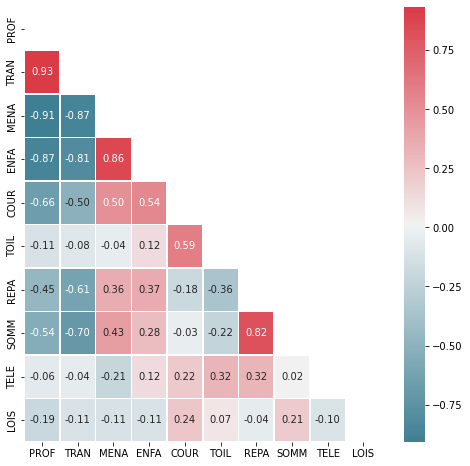

In [ ]:
corr = dataa.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
# pd.plotting.scatter_matrix(dataa, alpha=0.4,figsize=(10,10))

# Les variables les plus corrélées positivement sont : 


*   Tran & Prof 
*   Enfa & Mena
*   Somm & Repa 



# Les variables les plus corrélées négativement :

*   Mena & Prof
*   Mena & Tran
*   Enfa & Prof
*   Enfa & Tran
*   Som & Tran

# les variables les moins corrélées :

*   Som & Tele
*   Som & cour
*   Tele & Tran
*   Lois & Repa




#**2.3)  Transformation des données**

On va appliquer une ACP normée, donc il faut d’abord centrer et réduire les données

Commencez par convertir l’objet DataFrame en tableau de type array de
la librairie numpy, que l’on notera X(selon les notations du cours). Suivant
votre version de la librairie pandas, vous utiliserez la méthode to_numpy() (in-
troduite à partir de la version v0.24.0) ou bien la méthode plus ancienne values.

___________________________


Ensuite pour centrer et réduire les données, utilisez les fonctionnalités de
la classe StandardScaler de sklearn.preprocessing. Etudiez cette classe, en
particulier les méthodes fit() et transform(), puis effectuez la normalisation
des données pour obtenir la matrice Z(toujours selon les notations du cours).
Vérifiez que la moyenne et la variance des variables centrées réduites valent
bien 0 et 1 respectivement.

In [ ]:
from sklearn.preprocessing import StandardScaler
dataa2 = dataa.to_numpy()

In [ ]:
X = dataa2

In [ ]:
Z = StandardScaler().fit_transform(X)

In [ ]:
# on vérifie que la variance et la moyenne valent respectivement 1 et 0
np.var(Z), np.mean(Z)

(1.0, -5.947623346206196e-17)

#**2.4) ACP**

In [ ]:
n_comp = 3
# Calcul des composantes principales
pca3 = decomposition.PCA(n_components=n_comp)
principalComponents3 = pca3.fit_transform(Z)

In [ ]:
pca3.components_

array([[-0.45617162, -0.45738827,  0.42009993,  0.40712005,  0.26310001,
         0.0371177 ,  0.27465298,  0.30072032,  0.04642008,  0.04303032],
       [-0.08313782,  0.03991548,  0.01555795,  0.1226486 ,  0.52241218,
         0.56189036, -0.45973933, -0.39101336,  0.13262215,  0.07572669],
       [ 0.07358701,  0.00730326, -0.31534156, -0.07285172,  0.00396746,
         0.26290217,  0.37091612,  0.16605434,  0.80920117, -0.0262929 ]])

In [ ]:
pca3.explained_variance_

array([4.75861956, 2.19835526, 1.36990347])

In [ ]:
pca3.explained_variance_ratio_

array([0.45886689, 0.21198426, 0.13209783])

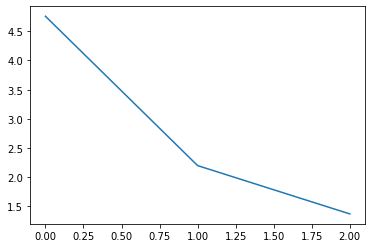

In [ ]:
plt.plot(pca3.explained_variance_)

In [ ]:
eigvals = pca3.explained_variance_
eigvals = eigvals.cumsum()

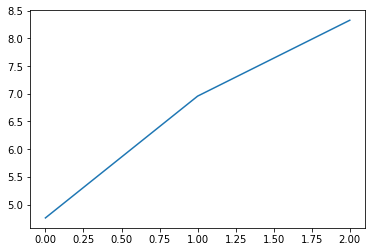

In [ ]:
plt.plot(eigvals)

#**PCA with 4 components**

In [ ]:
n_comp = 4
# Calcul des composantes principales
pca4 = decomposition.PCA(n_components=n_comp)
principalComponents4 = pca4.fit_transform(Z)

In [ ]:
pca4.explained_variance_


array([4.75861956, 2.19835526, 1.36990347, 1.23952376])

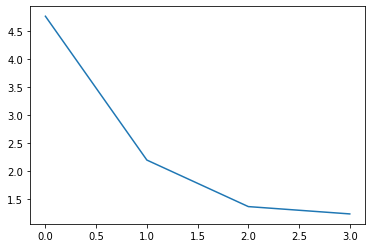

In [ ]:
plt.plot(pca4.explained_variance_)

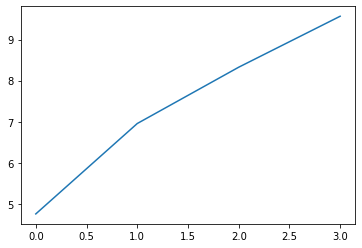

In [ ]:
eigvals = pca4.explained_variance_
eigvals = eigvals.cumsum()
plt.plot(eigvals)

**Règle de Kaiser :** On ne retient que les axes associés aux valeurs propores considérées comme les plus "informatives", donc supérieures à leur moyenne I/p.


Dans le cas d'une ACP normée, la moyenne vaut 1 .

Si on ajouter 5eme axe la 5eme valeur propre est moins de 1, donc on la rejette
 
C pourquoi, on continue la suite du problème avec **n_comp = 4**

#2.5 Représentation des individus et interprétation des résultats

In [ ]:
# la projection de la matrice des données Z sur les axes principaux avec la méthode transform() de la classe PCA.
prjt = pca4.transform(Z)

In [ ]:
prjt

array([[-1.77294023,  0.68605372,  1.87126791, -0.57515472],
       [-0.17158846,  2.21531946,  0.66076354, -0.43755646],
       [ 4.05339754,  2.2777057 ,  1.06051736,  0.52031377],
       [-1.77937472,  0.29267187,  1.8851417 , -0.73296793],
       [ 2.61425628,  2.28530029,  0.79723095, -0.10760356],
       [-1.50278808,  1.89173274,  1.36303671,  0.78226738],
       [-0.46524227,  2.84430152,  1.29641131,  0.14764754],
       [-1.17634265, -2.36767945,  1.11663161,  0.04580158],
       [ 0.31200416, -1.49527832,  0.27239115, -0.94330781],
       [ 4.32338245, -1.63256488,  0.89026435,  0.14379577],
       [-1.12537984, -2.46391614,  1.28556757, -0.15025034],
       [ 3.13127821, -1.98892449,  0.5881848 , -0.73455545],
       [-1.3700314 , -2.57197019,  0.52631513,  1.02282602],
       [ 1.09911097, -1.6551448 ,  0.54333862,  1.495662  ],
       [-2.16269694, -0.24104678, -0.70889861,  0.23933281],
       [-1.00478037,  0.1800679 , -1.61573889, -2.132342  ],
       [ 3.53743368, -0.

In [ ]:
df_prjt = pd.DataFrame(data = prjt)
df_prjt.head()

,0,1,2,3
0,-1.772940,0.686054,1.871268,-0.575155
1,-0.171588,2.215319,0.660764,-0.437556
2,4.053398,2.277706,1.060517,0.520314
3,-1.779375,0.292672,1.885142,-0.732968
4,2.614256,2.285300,0.797231,-0.107604


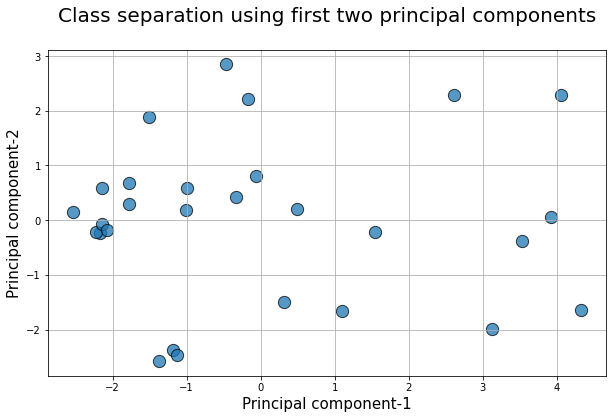

In [ ]:
#  Plot the first two columns of this transformed data set with the color set to original ground truth class label¶
plt.figure(figsize=(10,6))
plt.scatter(df_prjt[0],df_prjt[1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

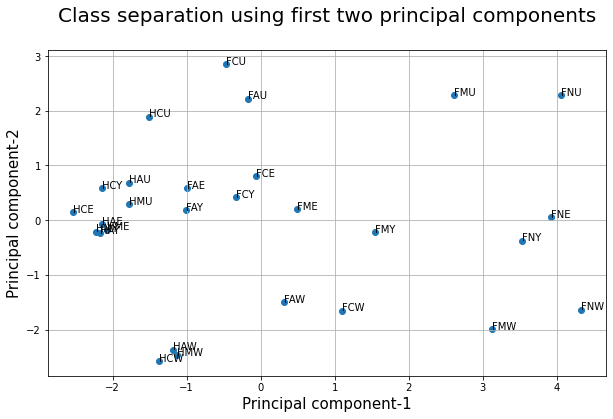

In [ ]:
afasl = df_prjt[0] 
ordn = df_prjt[1]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(afasl, ordn)

for i, txt in enumerate(pop):
    ax.annotate(txt, (afasl[i], ordn[i]))
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

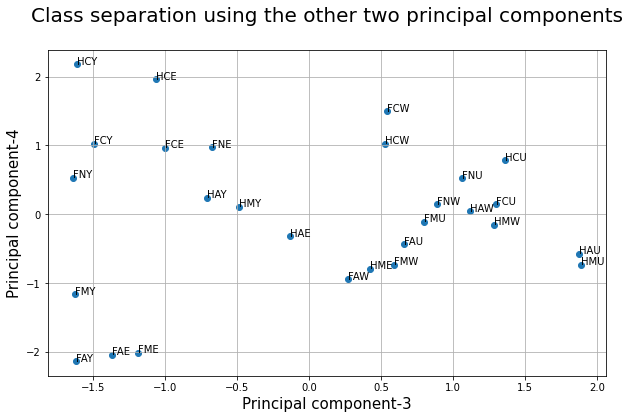

In [ ]:
afasl2 = df_prjt[2] 
ordn2 = df_prjt[3]
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(afasl2, ordn2)

for i, txt in enumerate(pop):
    ax.annotate(txt, (afasl2[i], ordn2[i]))
plt.grid(True)
plt.title("Class separation using the other two principal components\n",fontsize=20)
plt.xlabel("Principal component-3",fontsize=15)
plt.ylabel("Principal component-4",fontsize=15)
plt.show()

# **2.6) Représentation des variables (cercle des corrélations) et interprétation des résultats**


#I) Représentation des variables projetées et du cercle des corrélations sur le 1er plan factoriel :

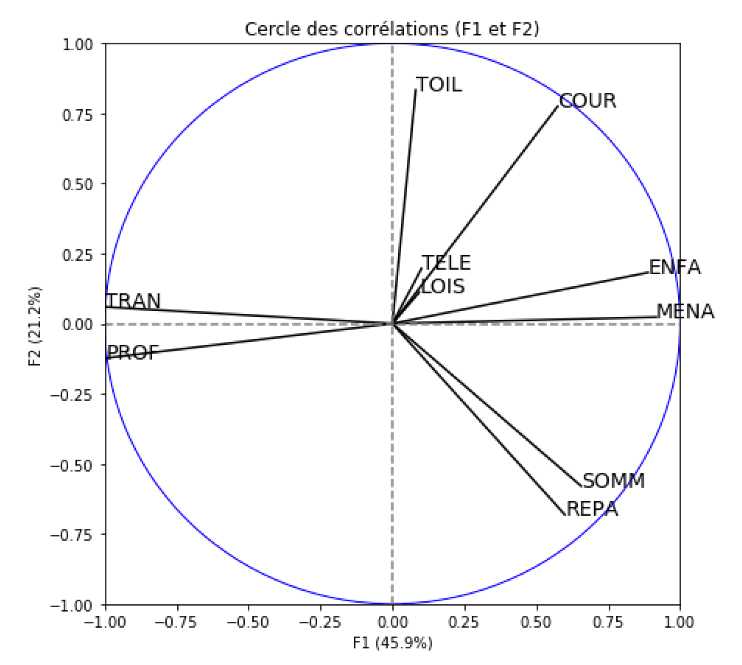

Variables qui déterminent chaque axe (en positif et en négatif) :
Remarque : on considère que les variables qui déterminent les axes sont celles
dont la corrélation est supérieure à 0.75 en valeur absolue.

Variables qui déterminent l’axe 1

- en positif : enfants, ménage

- en négatif : transport, profession

Variables qui déterminent l’axe 2

- en positif : toilette, courses

- en négatif : aucun

#I) Représentation des variables projetées et du cercle des corrélations sur le 2eme plan factoriel :

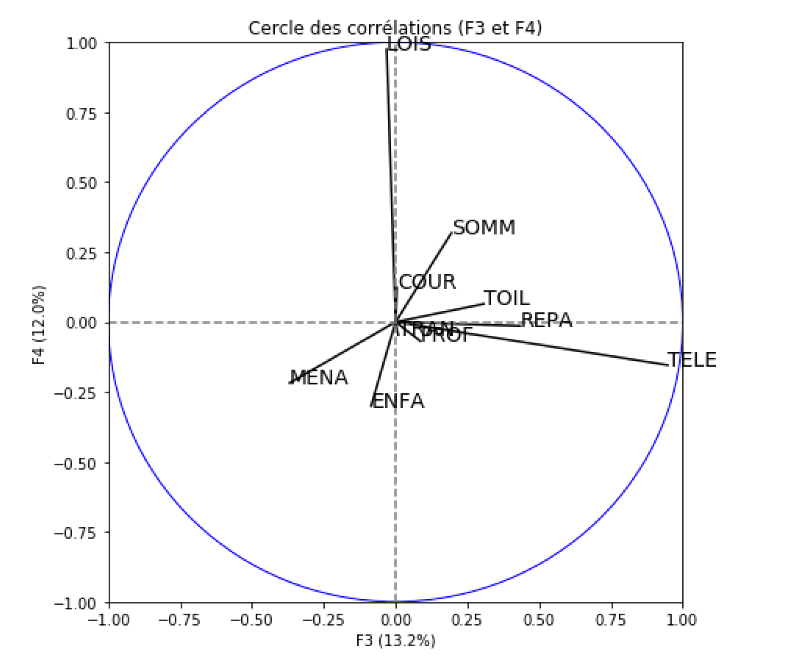

Variables qui déterminent chaque axe (en positif et en négatif) :
Remarque : on considère que les variables qui déterminent les axes sont celles
dont la corrélation est supérieure à 0.75 en valeur absolue.

Variables qui déterminent l’axe 3

- en positif : TV
- en négatif : aucun

Variables qui déterminent l’axe 4

- en positif : loisirs

- en négatif : aucun

#**2.7) Interprétation des différents axes :**

- **Axe 1 :** tâches ménagères vs tâches professionnelles. Les femmes inactives
passent plus de temps à s’occuper du ménage et des enfants, elles passent moins
de temps dans les transports et au travail.

- **Axe 2 :** tâches domestiques choisies : les femmes américaines passent plus de
temps à faire leur toilette et les courses, contrairement aux hommes d’Europe
de l’Ouest.

- **Axe 3 :** TV : les hommes américains mariés et/ou actifs passent beaucoup
de temps devant la télé, contrairement aux femmes yougoslaves.

- **Axe 4 :** loisirs : les hommes de l’Est passent plus de temps à leurs loisirs que
les femmes de l’Est et yougoslaves.